In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

In [2]:
df=pd.read_csv("F:\Work\diease detection\ckd\diease detection\chronic-1.csv")

In [3]:
df['sc'].unique()

array(['1.2', '0.8', '1.8', '3.8', '0.5', '1.4', '1.1', '1', '0.7', '7.2',
       '4', '24', '1.9', '2.7', '2.1', '4.6', '4.1', '0.9', '0.6', '5.2',
       '1.3', '9.6', '2.2', '1.6', '3.9', '76', '7.7', '?', '2.4', '1.5',
       '2.5', '7.3', '2', '3.4', '10.8', '6.3', '5.9', '3', '0.4', '3.25',
       '9.7', '32', '6.1', '6.4', '3.2', '3.3', '2.8', '6.7', '8.5', '15',
       '2.9', '1.7', '3.6', '5.6', '6.5', '4.4', '10.2', '11.5', '12.2',
       '5.3', '13.8', '9.2', '16.9', '6', '7.1', '18', '2.3', '13',
       '48.1', '14.2', '16.4', '7.5', '2.6', '4.3', '18.1', '11.8', '9.3',
       '6.8', '13.5', '12.8', '11.9', '12', '13.4', '13.3', '15.2'],
      dtype=object)

In [4]:
df=df.replace('?',np.nan)

In [5]:
data=df[['sg','al','bgr','bu','sc','pot','hemo','pcv','rbcc','rbc','htn',
         'dm','Label']].copy()

In [6]:
#df1=df.drop(columns=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'])

In [7]:
df1=data.drop(columns=['rbc','htn','dm','Label'])

In [8]:
df1

,sg,al,bgr,bu,sc,pot,hemo,pcv,rbcc
0,1.02,1,121,36,1.2,NaN,15.4,44,5.2
1,1.02,4,NaN,18,0.8,NaN,11.3,38,NaN
2,1.02,0,92,19,1.2,4.8,14.9,48,5.4
3,1.01,2,423,53,1.8,NaN,9.6,31,NaN
4,1.005,4,117,56,3.8,2.5,11.2,32,3.9
...,...,...,...,...,...,...,...,...,...
395,1.02,0,91,36,0.7,3.7,14,46,5.8
396,1.015,3,463,64,2.8,4.1,12.2,40,4.6
397,NaN,NaN,103,79,5.3,6.3,6.3,19,2.6
398,1.015,3,106,215,15.2,5.7,8.6,26,2.5


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [11]:
df2=imp.fit_transform(df1)

[IterativeImputer] Completing matrix with shape (400, 9)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.02
[IterativeImputer] Change: 101.70143499792034, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.04
[IterativeImputer] Change: 26.322011997998246, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.04
[IterativeImputer] Change: 12.87338850157496, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.05
[IterativeImputer] Change: 7.703245671939964, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.06
[IterativeImputer] Change: 5.097678177999722, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.07
[IterativeImputer] Change: 3.8297612053220575, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.07
[IterativeImputer] Change:

[IterativeImputer] Change: 3.578482601351851e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 69/100, elapsed time 0.57
[IterativeImputer] Change: 2.9203233473662493e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 70/100, elapsed time 0.58
[IterativeImputer] Change: 2.3833766007452795e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 71/100, elapsed time 0.59
[IterativeImputer] Change: 1.9452736337299825e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 72/100, elapsed time 0.60
[IterativeImputer] Change: 1.5877932874053258e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 73/100, elapsed time 0.61
[IterativeImputer] Change: 1.2960752081569993e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 74/100, elapsed time 0.62
[IterativeImputer] Change: 1.0580139130356159e-06, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation roun

In [12]:
dl1=pd.DataFrame(df2,columns=('sg','al','bgr','bu','sc','pot','hemo','pcv','rbcc'))

In [13]:
dl1.head(20)

,sg,al,bgr,bu,sc,pot,hemo,pcv,rbcc
0,1.020,1.0,121.000000,36.0,1.2,4.124980,15.4,44.0,5.200000
1,1.020,4.0,193.920015,18.0,0.8,3.177379,11.3,38.0,4.564634
2,1.020,0.0,92.000000,19.0,1.2,4.800000,14.9,48.0,5.400000
3,1.010,2.0,423.000000,53.0,1.8,4.404026,9.6,31.0,3.769510
4,1.005,4.0,117.000000,56.0,3.8,2.500000,11.2,32.0,3.900000
5,1.020,0.0,89.000000,42.0,0.5,5.000000,16.7,52.0,5.000000
6,1.010,2.0,106.000000,26.0,1.4,2.903219,11.6,35.0,4.600000
7,1.015,3.0,74.000000,25.0,1.1,3.200000,12.2,39.0,4.400000
8,1.025,0.0,124.000000,44.0,1.0,4.900000,14.9,41.0,5.700000
9,1.020,0.0,110.000000,50.0,0.7,5.000000,14.3,40.0,5.800000


In [14]:
df3=data.drop(columns=['sg','al','bgr','bu','sc','pot','hemo','pcv','rbcc','Label'])

In [15]:
df3

,rbc,htn,dm
0,NaN,yes,yes
1,NaN,no,no
2,normal,no,no
3,normal,no,yes
4,normal,yes,no
...,...,...,...
395,normal,no,no
396,NaN,yes,yes
397,NaN,yes,no
398,abnormal,yes,no


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant',fill_value='Missing')
df4=imputer.fit_transform(df3)

In [17]:
dl2=pd.DataFrame(df4,columns=('rbc','htn','dm'))

In [18]:
dl2.head()

,rbc,htn,dm
0,Missing,yes,yes
1,Missing,no,no
2,normal,no,no
3,normal,no,yes
4,normal,yes,no


In [19]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder()

In [20]:
dl3=ordi.fit_transform(dl2)

In [21]:
dl4=pd.DataFrame(dl3,columns=('rbc','htn','dm'))

In [22]:
dl4

,rbc,htn,dm
0,0.0,2.0,2.0
1,0.0,1.0,1.0
2,2.0,1.0,1.0
3,2.0,1.0,2.0
4,2.0,2.0,1.0
...,...,...,...
395,2.0,1.0,1.0
396,0.0,2.0,2.0
397,0.0,2.0,1.0
398,1.0,2.0,1.0


In [23]:
x=pd.concat([dl1,dl4],axis=1)

In [24]:
x

,sg,al,bgr,bu,sc,pot,hemo,pcv,rbcc,rbc,htn,dm
0,1.020000,1.000000,121.000000,36.0,1.2,4.124980,15.400000,44.00000,5.200000,0.0,2.0,2.0
1,1.020000,4.000000,193.920015,18.0,0.8,3.177379,11.300000,38.00000,4.564634,0.0,1.0,1.0
2,1.020000,0.000000,92.000000,19.0,1.2,4.800000,14.900000,48.00000,5.400000,2.0,1.0,1.0
3,1.010000,2.000000,423.000000,53.0,1.8,4.404026,9.600000,31.00000,3.769510,2.0,1.0,2.0
4,1.005000,4.000000,117.000000,56.0,3.8,2.500000,11.200000,32.00000,3.900000,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020000,0.000000,91.000000,36.0,0.7,3.700000,14.000000,46.00000,5.800000,2.0,1.0,1.0
396,1.015000,3.000000,463.000000,64.0,2.8,4.100000,12.200000,40.00000,4.600000,0.0,2.0,2.0
397,1.010179,2.378587,103.000000,79.0,5.3,6.300000,6.300000,19.00000,2.600000,0.0,2.0,1.0
398,1.015000,3.000000,106.000000,215.0,15.2,5.700000,8.600000,26.00000,2.500000,1.0,2.0,1.0


In [25]:
y=df['Label']

In [26]:
a=pd.concat([x,y],axis=1)

In [27]:
a

,sg,al,bgr,bu,sc,pot,hemo,pcv,rbcc,rbc,htn,dm,Label
0,1.020000,1.000000,121.000000,36.0,1.2,4.124980,15.400000,44.00000,5.200000,0.0,2.0,2.0,ckd
1,1.020000,4.000000,193.920015,18.0,0.8,3.177379,11.300000,38.00000,4.564634,0.0,1.0,1.0,ckd
2,1.020000,0.000000,92.000000,19.0,1.2,4.800000,14.900000,48.00000,5.400000,2.0,1.0,1.0,notckd
3,1.010000,2.000000,423.000000,53.0,1.8,4.404026,9.600000,31.00000,3.769510,2.0,1.0,2.0,ckd
4,1.005000,4.000000,117.000000,56.0,3.8,2.500000,11.200000,32.00000,3.900000,2.0,2.0,1.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020000,0.000000,91.000000,36.0,0.7,3.700000,14.000000,46.00000,5.800000,2.0,1.0,1.0,notckd
396,1.015000,3.000000,463.000000,64.0,2.8,4.100000,12.200000,40.00000,4.600000,0.0,2.0,2.0,ckd
397,1.010179,2.378587,103.000000,79.0,5.3,6.300000,6.300000,19.00000,2.600000,0.0,2.0,1.0,ckd
398,1.015000,3.000000,106.000000,215.0,15.2,5.700000,8.600000,26.00000,2.500000,1.0,2.0,1.0,ckd


In [28]:
#a=a.sort_values(['bu'],ascending=False)
#a.reset_index(drop=True,inplace=True)

In [29]:
#a.tail(40)

In [30]:
Label={'notckd':0,'ckd':1}
a['Label']=a['Label'].map(Label)

In [31]:
a.head(20)

,sg,al,bgr,bu,sc,pot,hemo,pcv,rbcc,rbc,htn,dm,Label
0,1.020,1.0,121.000000,36.0,1.2,4.124980,15.4,44.0,5.200000,0.0,2.0,2.0,1
1,1.020,4.0,193.920015,18.0,0.8,3.177379,11.3,38.0,4.564634,0.0,1.0,1.0,1
2,1.020,0.0,92.000000,19.0,1.2,4.800000,14.9,48.0,5.400000,2.0,1.0,1.0,0
3,1.010,2.0,423.000000,53.0,1.8,4.404026,9.6,31.0,3.769510,2.0,1.0,2.0,1
4,1.005,4.0,117.000000,56.0,3.8,2.500000,11.2,32.0,3.900000,2.0,2.0,1.0,1
5,1.020,0.0,89.000000,42.0,0.5,5.000000,16.7,52.0,5.000000,2.0,1.0,1.0,0
6,1.010,2.0,106.000000,26.0,1.4,2.903219,11.6,35.0,4.600000,2.0,1.0,1.0,1
7,1.015,3.0,74.000000,25.0,1.1,3.200000,12.2,39.0,4.400000,0.0,2.0,2.0,1
8,1.025,0.0,124.000000,44.0,1.0,4.900000,14.9,41.0,5.700000,2.0,1.0,1.0,0
9,1.020,0.0,110.000000,50.0,0.7,5.000000,14.3,40.0,5.800000,2.0,1.0,1.0,0


In [32]:
u=a.iloc[:,:-1]
v=a['Label']

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE 

In [34]:
smote=SMOTE()
sm = SVMSMOTE()

In [35]:
x_train_resample,y_train_resample=sm.fit_resample(u,v) 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
k=scaler.fit_transform(x_train_resample)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(k,y_train_resample,test_size=0.2, random_state=0)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
fold=ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
fold1=KFold(5)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [39]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [60]:
svm=SVC(C=10,kernel='rbf',gamma=0.1,probability=True)
knn=KNeighborsClassifier(n_neighbors=11)
rf=RandomForestClassifier(n_estimators=60,max_features='auto',bootstrap=True,
                          min_samples_split=3,min_samples_leaf=3,max_depth=None,random_state=0)
qda = QuadraticDiscriminantAnalysis()
tree=DecisionTreeClassifier(criterion='gini',min_samples_split=4,random_state=0,max_depth=None)
tree1=DecisionTreeClassifier(criterion='gini',min_samples_split=4,random_state=0,max_depth=8)
estimators1=[('svc',svm),('knn',knn)]
sc=StackingClassifier(estimators=estimators1,final_estimator=rf)
estimators=[('svc',svm),('knn',knn),('rf',rf)]

voting=VotingClassifier(estimators=estimators,voting='soft')
bag=BaggingClassifier(
    base_estimator=tree,
    n_estimators=500,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=0
    )
ada= AdaBoostClassifier(
      base_estimator=tree1,n_estimators=500,algorithm='SAMME', 
      random_state=0
      )
gdb=GradientBoostingClassifier(n_estimators=300,max_depth=3,learning_rate=0.1,min_samples_leaf=10)
lgb=LGBMClassifier(n_estimators=500,max_depth=3,learning_rate=0.1,min_child_weight=3)
xgb=XGBClassifier(n_estimators=200,max_depth=2,learning_rate=0.1,min_child_weight=3)

In [41]:
labels=['svm','knn','tree','rf','qda','voting','bag','ada','gdb','xgb','lgb','sc']

In [42]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    results_svm=cross_val_score(clf,x_train,y_train,cv=fold,scoring='accuracy')
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    print("%0.4faccuracy with a standard deviation of %0.4f" % (results_svm.mean(), results_svm.std()),label)

Time consumed for training: 0.162 seconds
1.0000accuracy with a standard deviation of 0.0000 svm
Time consumed for training: 0.019 seconds
1.0000accuracy with a standard deviation of 0.0000 knn
Time consumed for training: 0.012 seconds
0.9556accuracy with a standard deviation of 0.0283 tree
Time consumed for training: 0.463 seconds
0.9944accuracy with a standard deviation of 0.0111 rf
Time consumed for training: 0.013 seconds
0.9444accuracy with a standard deviation of 0.0248 qda


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time consumed for training: 0.535 seconds
1.0000accuracy with a standard deviation of 0.0000 voting
Time consumed for training: 4.048 seconds
0.9889accuracy with a standard deviation of 0.0136 bag
Time consumed for training: 0.018 seconds
0.9611accuracy with a standard deviation of 0.0283 ada
Time consumed for training: 1.543 seconds
0.9944accuracy with a standard deviation of 0.0111 gdb
[23:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: Use

[23:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time consumed for training: 0.368 seconds
0.9944accuracy with a standa

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Time consumed for training: 0.133 seconds
0.9944accuracy with a standard deviation of 0.0111 lgb
Time consumed for training: 0.740 seconds
1.0000accuracy with a standard deviation of 0.0000 sc


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score 

In [44]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    clf.fit(x_train,y_train)
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred),label)
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))
        

Time consumed for training: 0.008 seconds
0.9887640449438202 svm
[[37  1]
 [ 0 51]]
0.9807692307692307
1.0
0.9902912621359222
0.986842105263158
Time consumed for training: 0.001 seconds
0.9775280898876404 knn
[[36  2]
 [ 0 51]]
0.9622641509433962
1.0
0.9807692307692307
0.9736842105263158
Time consumed for training: 0.001 seconds
0.9887640449438202 tree
[[38  0]
 [ 1 50]]
1.0
0.9803921568627451
0.99009900990099
0.9901960784313726
Time consumed for training: 0.084 seconds
0.9887640449438202 rf
[[37  1]
 [ 0 51]]
0.9807692307692307
1.0
0.9902912621359222
0.986842105263158
Time consumed for training: 0.001 seconds
0.9550561797752809 qda
[[36  2]
 [ 2 49]]
0.9607843137254902
0.9607843137254902
0.9607843137254902
0.9540763673890611


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time consumed for training: 0.089 seconds
0.9887640449438202 voting
[[37  1]
 [ 0 51]]
0.9807692307692307
1.0
0.9902912621359222
0.986842105263158
Time consumed for training: 0.380 seconds
1.0 bag
[[38  0]
 [ 0 51]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.003 seconds
0.9550561797752809 ada
[[36  2]
 [ 2 49]]
0.9607843137254902
0.9607843137254902
0.9607843137254902
0.9540763673890611
Time consumed for training: 0.300 seconds
0.9887640449438202 gdb
[[37  1]
 [ 0 51]]
0.9807692307692307
1.0
0.9902912621359222
0.986842105263158
[23:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time consumed for training: 0.047 seconds
0.9887640449438202 xgb
[[37  1]
 [ 0 51]]
0.9807692307692307
1.0
0.9902912621359222
0.986842105263158
Time consu

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Time consumed for training: 0.135 seconds
0.9887640449438202 sc
[[37  1]
 [ 0 51]]
0.9807692307692307
1.0
0.9902912621359222
0.986842105263158


In [45]:
from mlxtend.evaluate import combined_ftest_5x2cv

In [46]:
f, p = combined_ftest_5x2cv(estimator1=svm,
                            estimator2=lgb,
                            X=k, y=y_train_resample,
                            random_seed=1)

In [47]:
print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 0.690
p value: 0.712


# Random Forest

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.3s finished


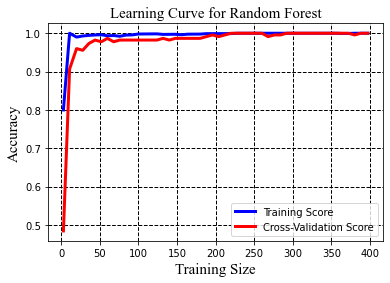

In [48]:
train_sizes,train_scores,test_scores=learning_curve(rf, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Random Forest', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("random.jpg",dpi=300)
plt.show()

# Voting

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.8s finished


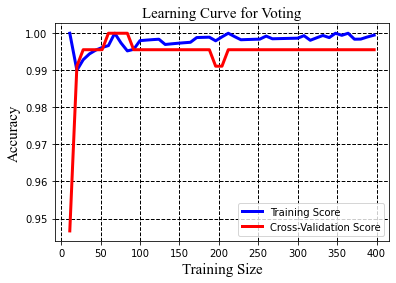

In [49]:
train_sizes,train_scores,test_scores=learning_curve(voting, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Voting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("voting.jpg",dpi=300)
plt.show()

# Bagging

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


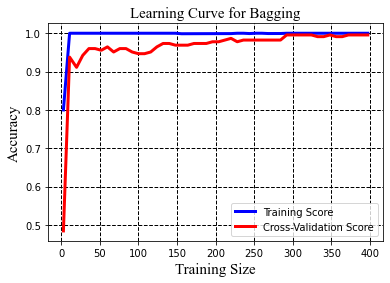

In [50]:
train_sizes,train_scores,test_scores=learning_curve(bag, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Bagging', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig('bagging.jpg',dpi=300)
plt.show()

# Adaptive

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.5s finished


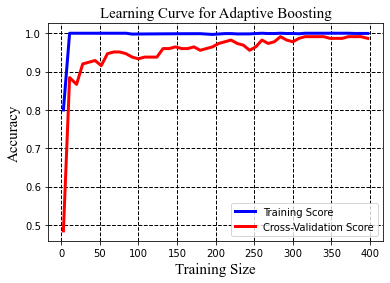

In [51]:
train_sizes,train_scores,test_scores=learning_curve(ada, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Adaptive Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('adaptive.jpg',dpi=300)
plt.show()

# Gradient

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.7s finished


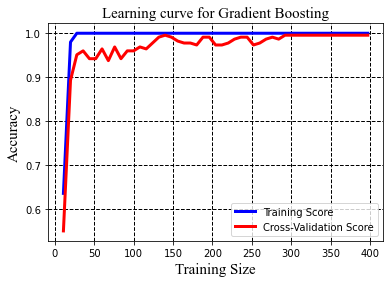

In [52]:
train_sizes,train_scores,test_scores=learning_curve(gdb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('gradient.jpg',dpi=300)
plt.show()

# LGB

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.1s finished


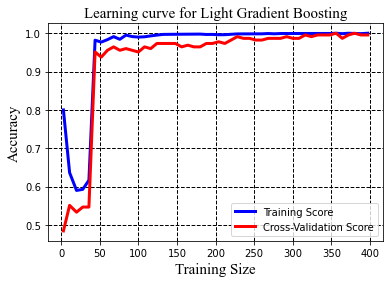

In [53]:
train_sizes,train_scores,test_scores=learning_curve(lgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Light Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Light.jpg',dpi=300)
plt.show()

# Xtreme

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.7s finished


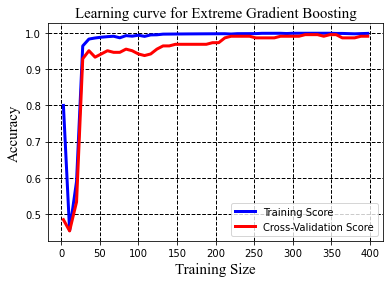

In [54]:
train_sizes,train_scores,test_scores=learning_curve(xgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Xtreme.jpg',dpi=300)
plt.show()

# Stacking

[learning_curve] Training set sizes: [  3  11  20  28  36  44  52  60  68  76  84  92 100 108 116 124 132 140
 148 156 164 172 180 188 196 204 212 220 228 236 244 252 260 268 276 284
 292 300 308 316 324 332 340 348 356 364 372 380 388 397]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.7s finished


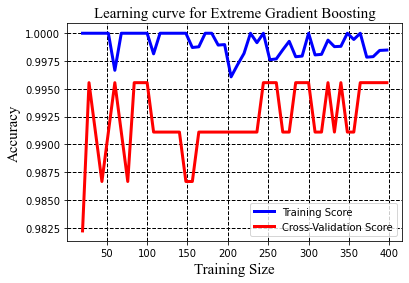

In [61]:
train_sizes,train_scores,test_scores=learning_curve(sc, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('Stacking.jpg',dpi=300)
plt.show()